## Here, we used new training data generated using a new dispersion that has been updated with the scale factor found by previous models


In [1]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *

from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  



## This function will plot the true vs. predicted with various line fits
def plotSummary(true, predicted, name):
    #from pylab import *
    #import numpy as np
    #import matplotlib.pyplot as plt
    
    figure()
    plt.scatter(true,predicted, alpha = 0.2)
    
    plt.title(name)
    plt.xlabel('True')
    plt.ylabel('Predicted')

    xmin, xmax = plt.xlim()
    plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

    fit_temp = np.polyfit(true, predicted,1)
    xp = np.linspace(xmin, xmax, 100)
    p = np.poly1d(fit_temp)
    plt.plot(xp, p(xp), '-', color = 'black')
    
    print(' ')
    print('RMSE on test data:', np.sqrt(mean_squared_error(true, predicted)), 'for ', name)
    print('R^2 Score on test data:', r2_score(true, predicted), 'for', name)

    
    return

def myResiduals(testY, predictY):
    ## residuals 1
    i = 0 # resetting i
    iterations = len(testY) # gets number of dots/points
    residual_sum = 0 # initializes sum of residuals
    for i in range (0,iterations): # for every dot/point
       ys = testY # get ys of testing data
       ys = ys.values # take out indexing, data types, names
       y = ys[i]
       predict_ys = predictY.values # get ys of all dots/points
       predict_y = predict_ys[i] # get the y value of the dot/point at specfic x value i
       diff = y - predict_y # find the difference in height
       diff = abs(diff) # take the absolute value
       residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals
    residual_average = residual_sum/iterations # find the average of the residuals
    print('The average residual for predict:', round(residual_average,4)) # display average of residuals

    minY = min(ys) # find the minimum y value for testing data
    maxY = max(ys) # find the max y value for testing data
    minpredict = min(predictY) # find the min y value for the prediction data
    maxpredict = max(predictY) # find the max y value for the prediction data
    #print('minY', minY, 'maxY', maxY)
    #print('minpredict', minpredict, 'maxpredict', maxpredict)
    rangeY = minY + maxY # find the range of the testing data
    rangepredict = minpredict - maxpredict # find the range of the predictions
    #print('rangeY', rangeY)
    #print('rangepredict', rangepredict)
    residual_percent_rangepredict = (residual_average/abs(rangepredict))*100 # calculate what percent the residual is of the range
    print('Residual is this percent of predict range', round(residual_percent_rangepredict,3), '%')
    
    return
    

In [2]:
#Load the training data


peak_names = ['peak1', 'peak2', 'peak3', 'peak4']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4']
width_names = ['width1', 'width2', 'width3','width4']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4']

col_names = ['deltaI', 'deltaR']+ peak_names + locs_names + width_names + prom_names

data = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData062118_v7.csv', header = None, names = col_names)

data.head()

X = data.drop(['deltaI', 'deltaR'], axis = 1)
Y = data[['deltaI', 'deltaR']]

ts1 = 0.3
rs1 = 42

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ts1, random_state = rs1 )
data.head()

,deltaI,deltaR,peak1,peak2,peak3,peak4,loc1,loc2,loc3,loc4,width1,width2,width3,width4,prom1,prom2,prom3,prom4
0,0.81472,-0.147980,5.5515,3.6143,2.7947,2.0804,-0.346,-0.220,-0.038,0.194,0.011646,0.023832,0.035493,0.045487,5.3308,3.2358,2.25530,1.36880
1,0.12699,-0.136070,3.0310,2.1081,1.6693,1.3521,-0.354,-0.238,-0.064,0.162,0.018905,0.035562,0.050650,0.068890,2.6371,1.5026,0.88367,0.49701
2,0.63236,-1.417600,9.8176,6.1802,4.6570,3.3744,-0.344,-0.218,-0.034,0.198,0.006878,0.014567,0.022973,0.030591,9.6909,5.9538,4.31700,2.86840
3,0.27850,-0.711760,12.6330,8.4448,6.1732,4.2781,-0.348,-0.224,-0.046,0.182,0.005249,0.010536,0.017181,0.024001,12.5390,8.2725,5.91570,3.85000
4,0.95751,-0.055153,5.6213,3.6863,2.8611,2.1287,-0.346,-0.220,-0.038,0.196,0.011604,0.023561,0.034931,0.044766,5.4064,3.3165,2.33140,1.42650


## Using the Best Models on the Hexagon Data

### Statsmodels

 
RMSE on test data: 0.1323346386185509 for  Delta I
R^2 Score on test data: 0.7917048390615196 for Delta I
 
RMSE on test data: 0.21828061164149556 for  Delta R
R^2 Score on test data: 0.7679395244977487 for Delta R
 
RMSE on test data: 0.21828061164149556 for  Delta R Zoomed In
R^2 Score on test data: 0.7679395244977487 for Delta R Zoomed In
The average residual for predict: 0.1074
Residual is this percent of predict range 7.089 %
The average residual for predict: 0.1572
Residual is this percent of predict range 2.968 %


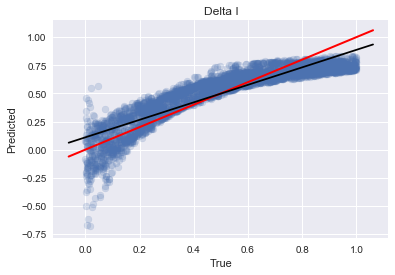

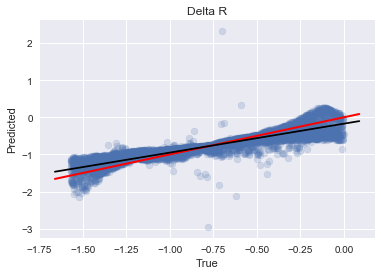

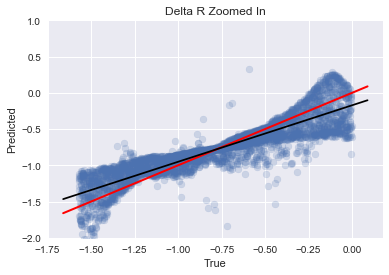

In [3]:
#Initialize and fit OLS model for deltaI 
model_OLS_I = sm.OLS(Y_train['deltaI'], X_train)
model_OLS_R = sm.OLS(Y_train['deltaR'], X_train)

results_OLS_I = model_OLS_I.fit()
results_OLS_R = model_OLS_R.fit()

#Make predictions on testing data
predictions_OLS_I = results_OLS_I.predict(X_test) # make the predictions by the model
predictions_OLS_R = results_OLS_R.predict(X_test)

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_test['deltaI'], predictions_OLS_I,'Delta I')
#ylim([-1,5])
plotSummary(Y_test['deltaR'], predictions_OLS_R, 'Delta R')
plotSummary(Y_test['deltaR'], predictions_OLS_R, 'Delta R Zoomed In')
ylim([-2,1])

myResiduals(Y_test['deltaI'], predictions_OLS_I)
myResiduals(Y_test['deltaR'], predictions_OLS_R)


### Decision Tree

 
RMSE on test data: 0.015558326166391823 for  deltaI Depth 60
R^2 Score on test data: 0.9971208926855749 for deltaI Depth 60
 
RMSE on test data: 0.018142982762424698 for  deltaR Depth 60
R^2 Score on test data: 0.9983967980604113 for deltaR Depth 60
 
Regression - Decision Tree -  Score:  0.9980261202951604 , using max depth of 30
 
Cross Validation Scores for regressor with max depth of  30  :  [0.99851167 0.99861457 0.9971687  0.99855224 0.99852223 0.99851465
 0.99632164 0.99880865 0.99859086 0.99849689]


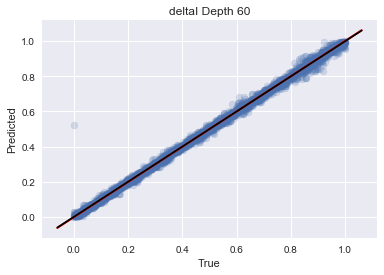

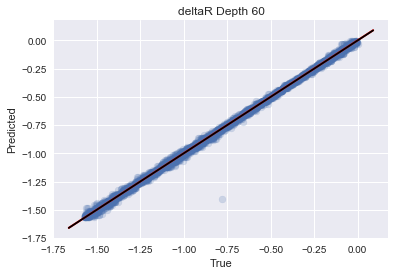

In [16]:
#Initialize the model
rs = 42
regr_DT = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT.fit(X_train, Y_train)

#Print the coefficients or importances

data1 = pd.DataFrame(regr_DT.feature_importances_.T, columns = ['Regr - DT']) 

data1.index = X_train.columns

#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
y_pred_DT = regr_DT.predict(X_test)

#Plot results
plotSummary(Y_test['deltaI'], y_pred_DT[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y_test['deltaR'], y_pred_DT[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])


print(' ')

#Trying to understand the scoring
print('Regression - Decision Tree -  Score: ', regr_DT.score(X_test,Y_test),', using max depth of 30')
print(' ')
regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print( 'Cross Validation Scores for regressor with max depth of ', regressor.max_depth, ' : ', cross_val_score(regressor, X, Y, cv=10))

## Random Forest


Score - Random Forest: 0.9987609222975464 for delta I/R 10
 
RMSE on test data: 0.01242557641524529 for  deltaI 10
R^2 Score on test data: 0.9981636088198962 for deltaI 10
 
RMSE on test data: 0.01428939992691454 for  deltaR 10
R^2 Score on test data: 0.9990055136276219 for deltaR 10


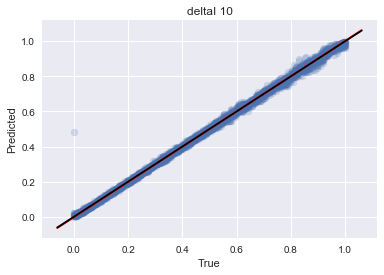

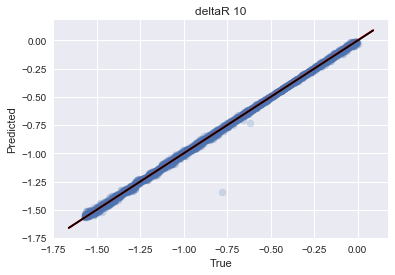

In [5]:
rs = 42
regr_RF = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF = regr_RF.fit(X_train, Y_train)

predict_RF = model_RF.predict(X_test)


importance_RF_10 = pd.Series(model_RF.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF.score(X_test, Y_test), 'for delta I/R 10')

plotSummary(Y_test['deltaI'], predict_RF[:,0], 'deltaI 10')
plotSummary(Y_test['deltaR'], predict_RF[:,1], 'deltaR 10')


## Independent Random Forests


Score - Random Forest: 0.9993056286639779 for delta I/R 10
 
RMSE on test data: 0.011940168771106823 for  deltaI 10
R^2 Score on test data: 0.9993056286639778 for deltaI 10
 
RMSE on test data: 0.009622715098903998 for  deltaR 10
R^2 Score on test data: 0.9988986449063505 for deltaR 10


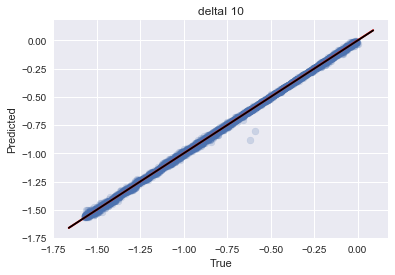

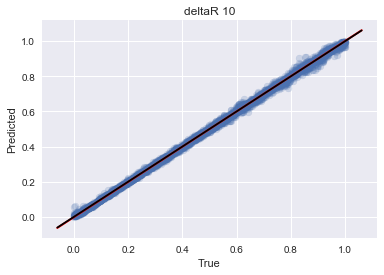

In [6]:
#Trying Independent Random Forest

rs = 42
md = 30
n = 30

regr_RF2_dr = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)

model_RF2_dr = regr_RF2_dr.fit(X_train, Y_train['deltaR'])
model_RF2_di = regr_RF2_di.fit(X_train, Y_train['deltaI'])

predict_RF2_dr = model_RF2_dr.predict(X_test)
predict_RF2_di = model_RF2_di.predict(X_test)


#importance_RF_10 = pd.Series(model_RF2.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF2_dr.score(X_test, Y_test['deltaR']), 'for delta I/R 10')

plotSummary(Y_test['deltaR'], predict_RF2_dr, 'deltaI 10')
plotSummary(Y_test['deltaI'], predict_RF2_di, 'deltaR 10')


## AdaBoost Random Forest

 
RMSE on test data: 0.010288682306238148 for  AdaBoost Delta I
R^2 Score on test data: 0.9987409249332574 for AdaBoost Delta I
 
RMSE on test data: 0.011538018167259731 for  AdaBoost Delta R
R^2 Score on test data: 0.999351614505161 for AdaBoost Delta R
Delta I AdaBoost Score: 0.9987409249332575
Delta R AdaBoost Score: 0.999351614505161


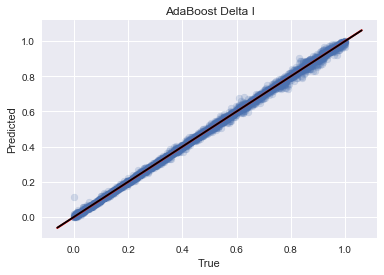

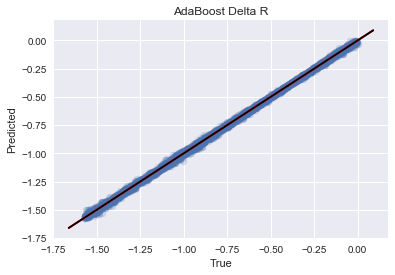

In [7]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)

model_AB = regr_AB.fit(X_train, Y_train['deltaI'])
model_AB_R = regr_ABR.fit(X_train, Y_train['deltaR'])

y_pred_AB1 = model_AB.predict(X_test)
y_pred_AB1_R = model_AB_R.predict(X_test)


plotSummary(Y_test['deltaI'], y_pred_AB1, 'AdaBoost Delta I')
plotSummary(Y_test['deltaR'], y_pred_AB1_R, 'AdaBoost Delta R')

print('Delta I AdaBoost Score:', model_AB.score(X_test, Y_test['deltaI']))
print('Delta R AdaBoost Score:', model_AB_R.score(X_test, Y_test['deltaR']))


## Gradient Boosting Random Forest

In [8]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30


regr_GB = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GBR = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)



In [9]:
model_GB = regr_GB.fit(X_train, Y_train['deltaI'])


In [10]:
model_GB_R = regr_GBR.fit(X_train, Y_train['deltaR'])


 
RMSE on test data: 0.016696310498640066 for  GradientBoost Delta I
R^2 Score on test data: 0.9966843159933861 for GradientBoost Delta I
 
RMSE on test data: 0.0229189233556662 for  GradientBoost Delta R
R^2 Score on test data: 0.9974416540085005 for GradientBoost Delta R
Delta I Gradient Boost Score: 0.9966843159933861
Delta R Gradient Boost Score: 0.9974416540085005


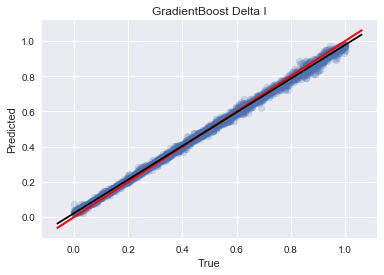

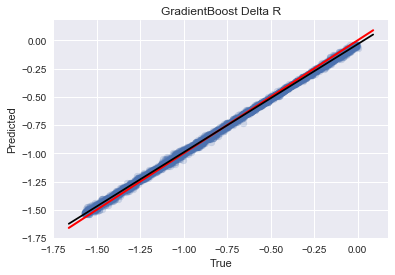

In [11]:
y_pred_GB1 = model_GB.predict(X_test)
y_pred_GB1_R = model_GB_R.predict(X_test)

plotSummary(Y_test['deltaI'], y_pred_GB1, 'GradientBoost Delta I')
plotSummary(Y_test['deltaR'], y_pred_GB1_R, 'GradientBoost Delta R')

print('Delta I Gradient Boost Score:', model_GB.score(X_test, Y_test['deltaI']))
print('Delta R Gradient Boost Score:', model_GB_R.score(X_test, Y_test['deltaR']))


## Testing the Models on the Experimental Data



In [12]:
# Load the experimental data
col_names2 = peak_names + locs_names + width_names + prom_names
exp_data = pd.read_csv('Training_Data/Hexagon/HexagonExperimental_v7.csv', header = None, names = col_names2)

pred_phase_OLS_R = results_OLS_R.predict(exp_data)
pred_phase_OLS_I = results_OLS_I.predict(exp_data)

pred_phase_DT = np.append(regr_DT.predict(exp_data),r2_score(Y_test['deltaI'], y_pred_DT[:,0])).reshape(3,1).T
pred_phase_DT = np.append(pred_phase_DT, r2_score(Y_test['deltaR'], y_pred_DT[:,1])).reshape(4,1).T
#pred_phase_DT = np.append(pred_phase_DT, r2_score(Y_test['scale_factor'], y_pred_DT[:,2]))

pred_phase_RF = regr_RF.predict(exp_data)

pred_phase_AB_R = model_AB_R.predict(exp_data)
pred_phase_AB_I = model_AB.predict(exp_data)

pred_phase_GB_I = model_GB.predict(exp_data)
pred_phase_GB_R = model_GB_R.predict(exp_data)

pred_phase_IRF_di = model_RF2_di.predict(exp_data)
pred_phase_IRF_dr = model_RF2_dr.predict(exp_data)

predictedPhases = pd.DataFrame(pred_phase_DT, columns = ['deltaI', 'deltaR', 'deltaI score', 'deltaR score'], index = ['Decision Tree'])

predictedPhases.loc['OLS'] = (pred_phase_OLS_I[0], pred_phase_OLS_R[0], r2_score(Y_test['deltaI'],predictions_OLS_I ), r2_score(Y_test['deltaR'],predictions_OLS_R ))
predictedPhases.loc['Random Forest'] = (pred_phase_RF[0,0], pred_phase_RF[0,1], r2_score(Y_test['deltaI'], predict_RF[:,0]), r2_score(Y_test['deltaR'], predict_RF[:,1]))

predictedPhases.loc['AdaBoost'] = (pred_phase_AB_I[0], pred_phase_AB_R[0],r2_score(Y_test['deltaI'], y_pred_AB1), r2_score(Y_test['deltaR'], y_pred_AB1_R))
predictedPhases.loc['Gradient Boosting'] = (pred_phase_GB_I[0], pred_phase_GB_R[0],  r2_score(Y_test['deltaI'], y_pred_GB1), r2_score(Y_test['deltaR'], y_pred_GB1_R))
predictedPhases.loc['Independent Random Forests'] = (pred_phase_IRF_di[0], pred_phase_IRF_dr[0],  r2_score(Y_test['deltaI'], predict_RF2_di ), r2_score(Y_test['deltaR'], predict_RF2_dr))

predictedPhases

,deltaI,deltaR,deltaI score,deltaR score
Decision Tree,0.080292,-0.184685,0.997121,0.998397
OLS,-1.779790,5.190409,0.791705,0.767940
Random Forest,0.051863,-0.175746,0.998164,0.999006
AdaBoost,0.020536,-0.062475,0.998741,0.999352
Gradient Boosting,0.040289,-0.090471,0.996684,0.997442
Independent Random Forests,0.033019,-0.071193,0.998899,0.999306


In [13]:
#Since this prediction has a score less than 0.99, we will exclude it. 
GoodPredictedPhases = predictedPhases.drop(['OLS'], axis = 0)

deltaI_1 = (GoodPredictedPhases['deltaI']*GoodPredictedPhases['deltaI score']).mean()
deltaR_1 = (GoodPredictedPhases['deltaR']*GoodPredictedPhases['deltaR score']).mean()

print('The weighted average for the predicted phase is: ', deltaR_1, ' + ', deltaI_1, '*i')


The weighted average for the predicted phase is:  -0.11675556859948584  +  0.04509557223105219 *i
